In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

data = pd.read_csv('valenbisi_mov.csv')

In [2]:
data.head()

,Date,Weekday,Is_holiday,T_min,T_mean,T_max,Prec,Hour,Quarter,Vel_mean,Vel_max,Id_station,Open,Bikes,Slots,Latitude,Longitude,Inputs,Outputs,Mov
0,01-01-2023,Sun,True,7.0,12.1,17.2,0.0,0,0,0.0,4.2,1,True,15,10,39.480042,-0.382929,0,0,0
1,01-01-2023,Sun,True,7.0,12.1,17.2,0.0,0,15,0.0,4.2,1,True,14,11,39.480042,-0.382929,0,1,1
2,01-01-2023,Sun,True,7.0,12.1,17.2,0.0,0,30,0.0,4.2,1,True,14,11,39.480042,-0.382929,0,0,0
3,01-01-2023,Sun,True,7.0,12.1,17.2,0.0,0,45,0.0,4.2,1,True,13,12,39.480042,-0.382929,0,1,1
4,01-01-2023,Sun,True,7.0,12.1,17.2,0.0,1,0,0.0,4.2,1,True,13,12,39.480042,-0.382929,0,0,0


In [3]:
#data['Date'] = [datetime.strptime(i, '%d-%m-%Y') for i in list(data['Date'])]

### Detección de valores faltantes

In [4]:
data.isnull().sum()

Date              0
Weekday           0
Is_holiday        0
T_min             0
T_mean            0
T_max             0
Prec          26220
Hour              0
Quarter           0
Vel_mean          0
Vel_max           0
Id_station        0
Open              0
Bikes             0
Slots             0
Latitude          0
Longitude         0
Inputs            0
Outputs           0
Mov               0
dtype: int64

In [5]:
count_prec = data.groupby(['Prec'], as_index = False)['Open'].count()
count_prec

,Prec,Open
0,0.0,3238214
1,0.1,78660
2,0.2,26220
3,0.5,26496
4,0.7,52716
5,1.1,25944
6,1.7,26496
7,2.1,24012
8,2.4,26496
9,2.5,25944


In [6]:
data['Prec'].fillna(data['Prec'].mean(), inplace=True)

### Análisis exploratorio

**¿Depende el uso del servicio del día de la semana?**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Mean movements by weekday')

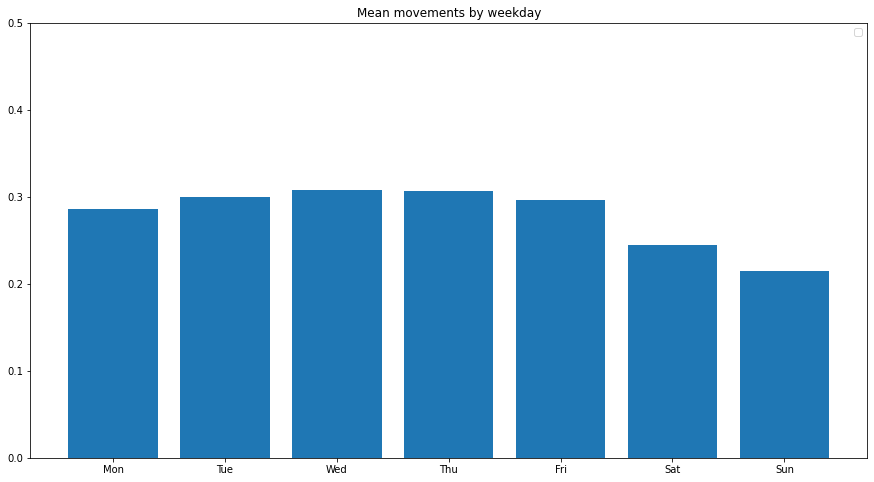

In [7]:
# día de la semana

lista_dias = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays = pd.api.types.CategoricalDtype(categories=lista_dias)

data["Weekday"] = data["Weekday"].astype(weekdays)

by_weekday = data.groupby(['Weekday'], as_index = False)['Mov'].mean()
by_weekday['Mov'] = by_weekday['Mov']/2

x = np.arange(7)
width = 0.25

plt.figure(figsize=(15, 8))
plt.bar(x, by_weekday['Mov'])
#plt.bar(x+width, by_weekday['Outputs'], width = width, label = 'Outputs')

plt.xticks(x, by_weekday['Weekday'])
plt.ylim(bottom = 0, top = 0.5)
plt.legend()
plt.title('Mean movements by weekday')

Vemos que hay algo de diferencia entre los días entre semana y los fines de semana, pero no es tampoco un efecto muy grande.

**¿Afecta el hecho de que sea festivo o no festivo?**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Mean movements whether the day is holiday or not')

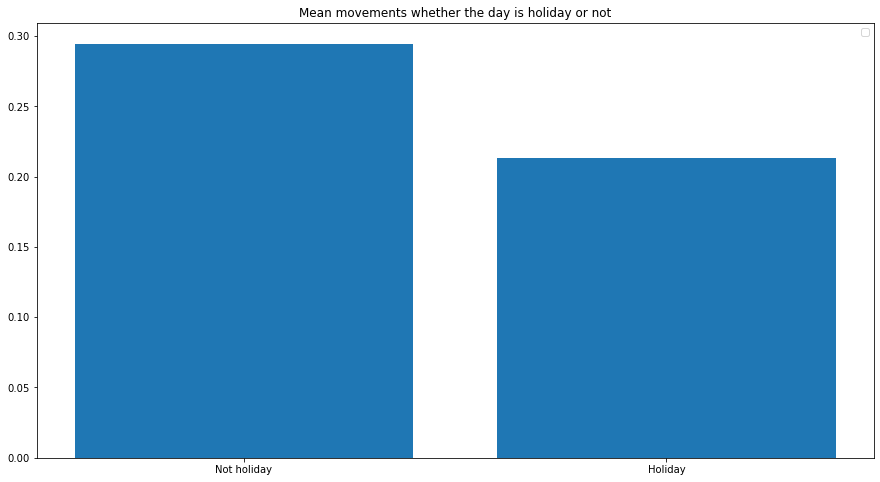

In [8]:
# festivos no festivos

by_holiday = data.groupby(['Is_holiday'], as_index = False)['Mov'].mean()
by_holiday['Mov'] = by_holiday['Mov']/2

x = np.arange(2)
width = 0.25

plt.figure(figsize=(15, 8))
plt.bar(x, by_holiday['Mov'])

plt.xticks(x, ['Not holiday', 'Holiday'])
plt.legend()
plt.title('Mean movements whether the day is holiday or not')

De nuevo, hay algo de diferencia pero tampoco muy notable.

**Distribución por horas**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Mean movements by hour')

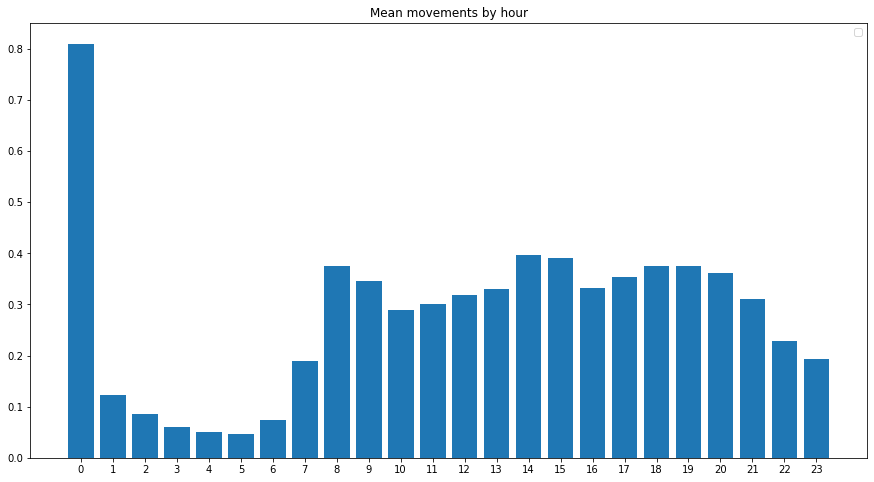

In [9]:
# Horas

by_hour = data.groupby(['Hour'], as_index = False)['Mov'].mean()
by_hour['Mov'] = by_hour['Mov']/2

x = np.arange(len(by_hour))
width = 0.25

plt.figure(figsize=(15, 8))
plt.bar(x, by_hour['Mov'])

plt.xticks(x, by_hour['Hour'])
plt.legend()
plt.title('Mean movements by hour')

Se pueden agrupar por franjas:
- Madrugada: 1-8
- Mañana: 8-20
- Noche: 20-00
- Franja 00

Hay una franja suelta para las 00 ya que presenta un comportamiento poco usual frente a lo que se podría esperar.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Mean movements by quarter at 00')

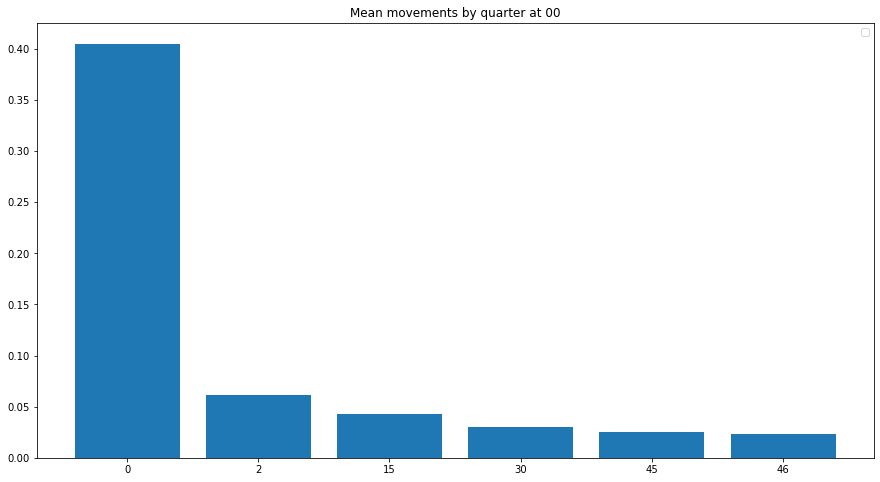

In [10]:
hora_0 = data.loc[data['Hour'] == 0]


by_quarter = data.groupby(['Quarter'], as_index = False)['Mov'].mean()
by_quarter['Mov'] = by_hour['Mov']/2

x = np.arange(len(by_quarter))
width = 0.25

plt.figure(figsize=(15, 8))
plt.bar(x, by_quarter['Mov'])

plt.xticks(x, by_quarter['Quarter'])
plt.legend()
plt.title('Mean movements by quarter at 00')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Number of times stations have had mov>20 at 00.00')

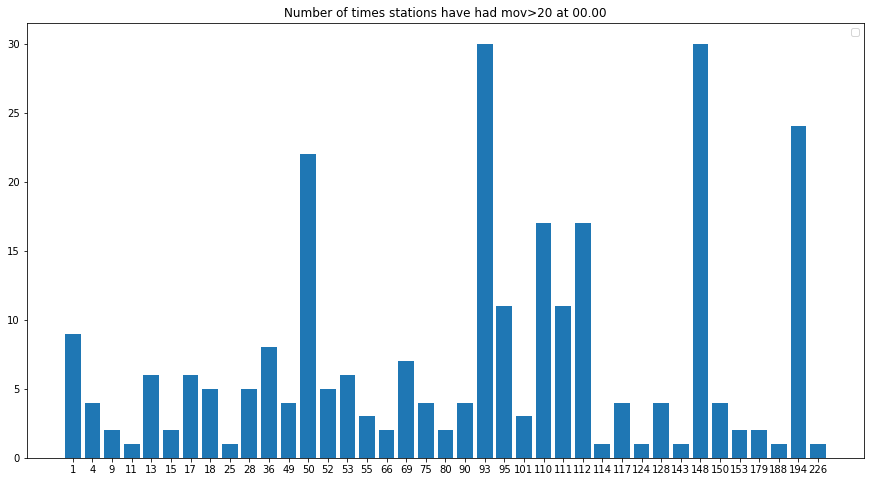

In [11]:
quarter_0_0 = data.loc[np.logical_and(data['Hour'] == 0, data['Quarter'] == 0)]

mean_0 = data.loc[data['Hour'] == 0]['Hour'].mean()

a = quarter_0_0.loc[quarter_0_0['Mov'] > 20]

a_group = a.groupby(['Id_station'], as_index = False)['Bikes'].count()

x = np.arange(len(a_group))
width = 0.25

plt.figure(figsize=(15, 8))
plt.bar(x, a_group['Bikes'])

plt.xticks(x, a_group['Id_station'])
plt.legend()
plt.title('Number of times stations have had mov>20 at 00.00')

**Distribución por horas según festivo/no festivo**

Text(0.5, 1.0, 'Mean movements by hour: holiday/not holiday')

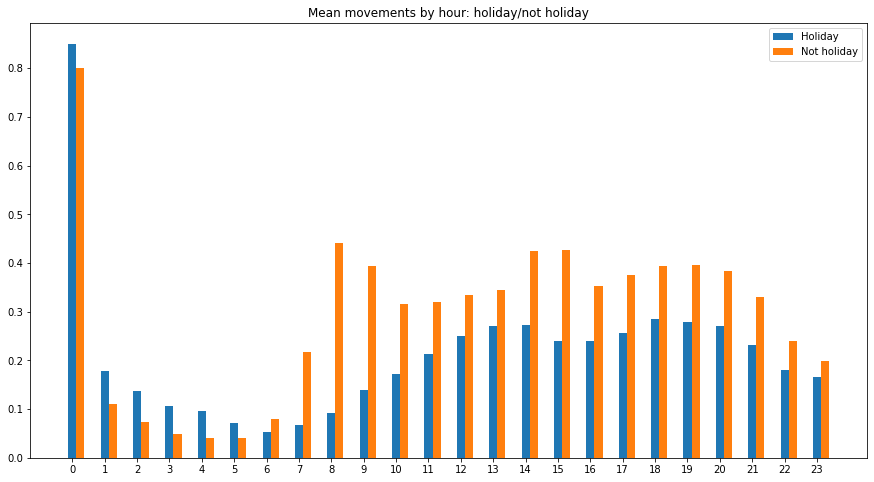

In [12]:
fest = data.loc[data['Is_holiday'] == True]
not_fest = data.loc[data['Is_holiday'] == False]

by_hour_fest = fest.groupby(['Hour'], as_index = False)['Mov'].mean()
by_hour_fest['Mov'] = by_hour_fest['Mov']/2

by_hour_nfest = not_fest.groupby(['Hour'], as_index = False)['Mov'].mean()
by_hour_nfest['Mov'] = by_hour_nfest['Mov']/2

x = np.arange(len(by_hour_fest))
width = 0.25

plt.figure(figsize=(15, 8))
plt.bar(x, by_hour_fest['Mov'], width = width, label = 'Holiday')
plt.bar(x+width, by_hour_nfest['Mov'], width = width, label = 'Not holiday')

plt.xticks(x, by_hour_fest['Hour'])
plt.legend()
plt.title('Mean movements by hour: holiday/not holiday')

!! Los días festivos tienden a tener más uso que los no festivos en horas de madrugada y menos en horas durante el día.

**¿Afecta la temperatura?**

Text(0.5, 1.0, 'Mean movements by min temperature')

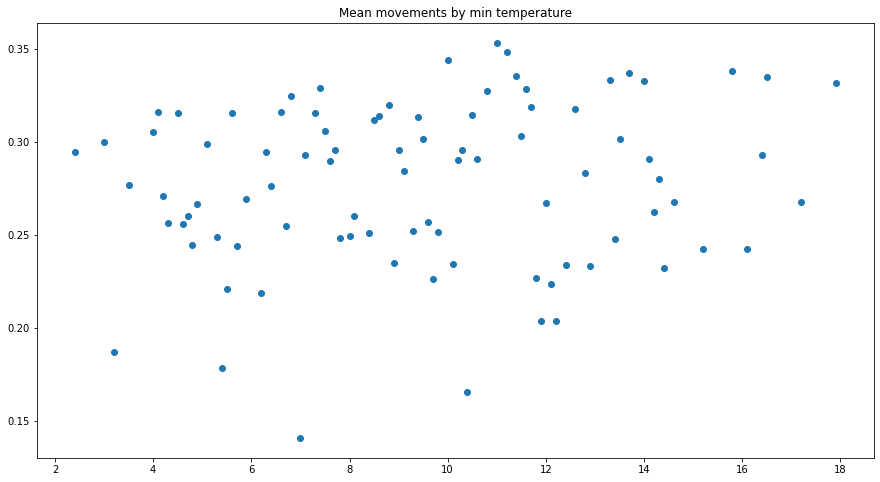

In [13]:
# temperatura minima

aux = data
#aux['T_min'] = round(aux['T_min'])

by_t_min = aux.groupby(['T_min'], as_index = False)['Mov'].mean()
by_t_min['Mov'] = by_t_min['Mov']/2

#x = np.arange(len(by_t_min))
width = 0.25

plt.figure(figsize=(15, 8))
plt.scatter(by_t_min['T_min'], by_t_min['Mov'])
#plt.bar(x+width, by_t_min['Outputs'], width = width, label = 'Outputs')

#plt.xticks(aux['T_min'], aux['Mov'])
#plt.legend()
plt.title('Mean movements by min temperature')

Text(0.5, 1.0, 'Mean movements by max temperature')

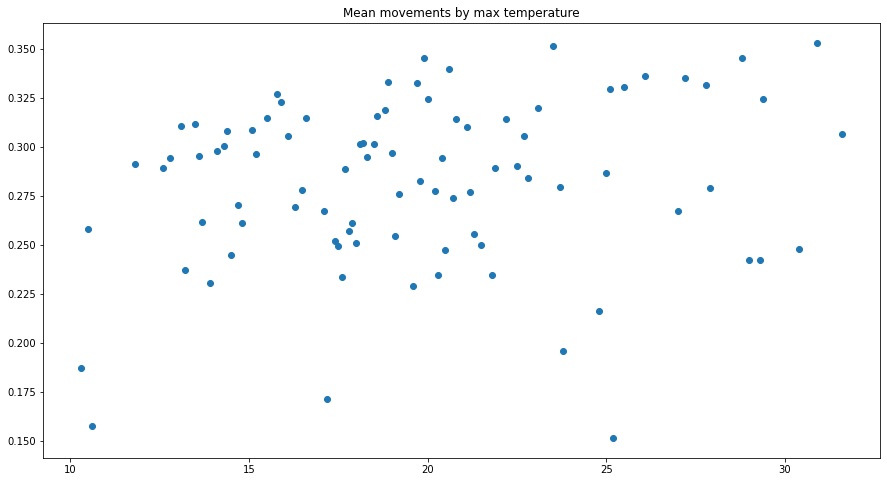

In [14]:
# t max

aux = data
#aux['T_max'] = round(aux['T_max'])

by_t_max = aux.groupby(['T_max'], as_index = False)['Mov'].mean()
by_t_max['Mov'] = by_t_max['Mov']/2

#x = np.arange(len(by_t_max))
width = 0.25

plt.figure(figsize=(15, 8))
plt.scatter(by_t_max['T_max'], by_t_max['Mov'])
#plt.bar(x+width, by_t_max['Outputs'], width = width, label = 'Outputs')

#plt.xticks(x, by_t_max['T_max'])
#plt.legend()
plt.title('Mean movements by max temperature')

Text(0.5, 1.0, 'Mean movements by mean temperature')

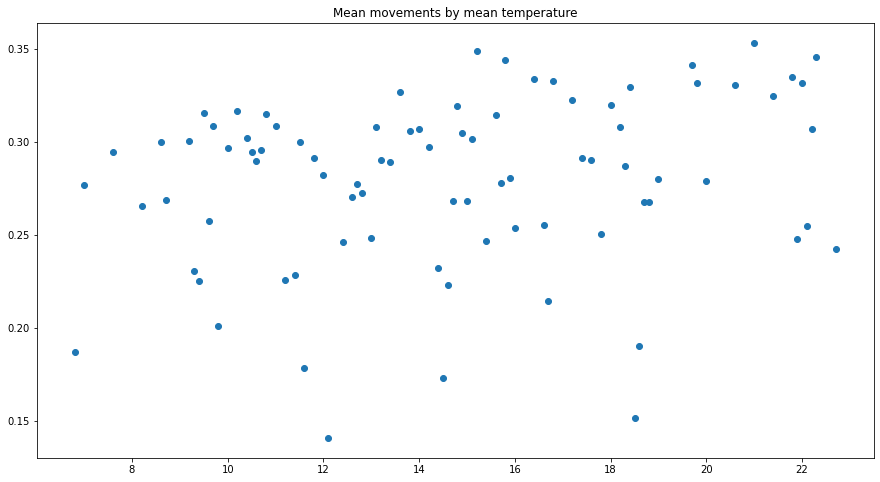

In [15]:
# t mean

aux = data
#aux['T_min'] = round(aux['T_mean'])

by_t_mean = aux.groupby(['T_mean'], as_index = False)['Mov'].mean()
by_t_mean['Mov'] = by_t_mean['Mov']/2

#x = np.arange(len(by_t_mean))
width = 0.25

plt.figure(figsize=(15, 8))
plt.scatter(by_t_mean['T_mean'], by_t_mean['Mov'])
#plt.bar(x+width, by_t_mean['Outputs'], width = width, label = 'Outputs')

#plt.xticks(x, by_t_mean['T_mean'])
#plt.legend()
plt.title('Mean movements by mean temperature')

No hay diferencias apreciables.

**¿Afectan las precipitaciones?**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Mean movements by precipitation')

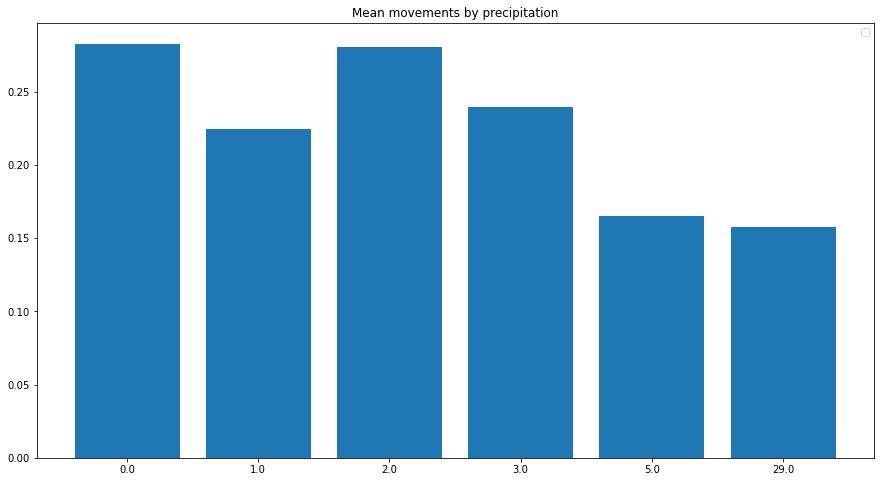

In [16]:
# lluvia

aux = data
aux['Prec'] = round(aux['Prec'])

by_prec = aux.groupby(['Prec'], as_index = False)['Mov'].mean()
by_prec['Mov'] = by_prec['Mov']/2

x = np.arange(len(by_prec))
width = 0.25

plt.figure(figsize=(15, 8))
plt.bar(x, by_prec['Mov'])

plt.xticks(x, by_prec['Prec'])
plt.legend()
plt.title('Mean movements by precipitation')

Text(0.5, 1.0, 'Mean movements by precipitation')

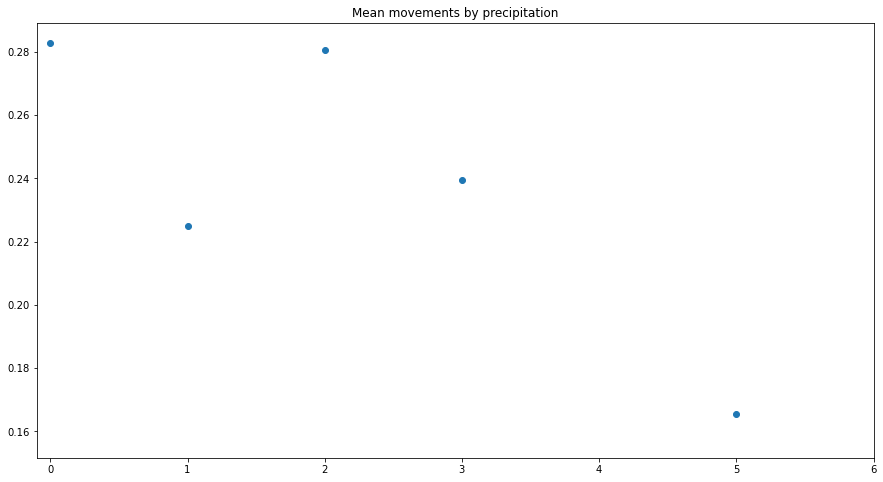

In [17]:
# lluvia

aux = data
#aux['Prec'] = round(aux['Prec'])

by_prec = aux.groupby(['Prec'], as_index = False)['Mov'].mean()
by_prec['Mov'] = by_prec['Mov']/2

#x = np.arange(len(by_prec))
width = 0.25

plt.figure(figsize=(15, 8))
plt.scatter(by_prec['Prec'], by_prec['Mov'])

#plt.xticks(x, by_prec['Prec'])
#plt.legend()
plt.xlim(left = -0.1, right = 6)
plt.title('Mean movements by precipitation')

Se podría decir que afecta a partir de los 5mm.

**¿Afecta la velocidad del viento?**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Mean movements by wind speed')

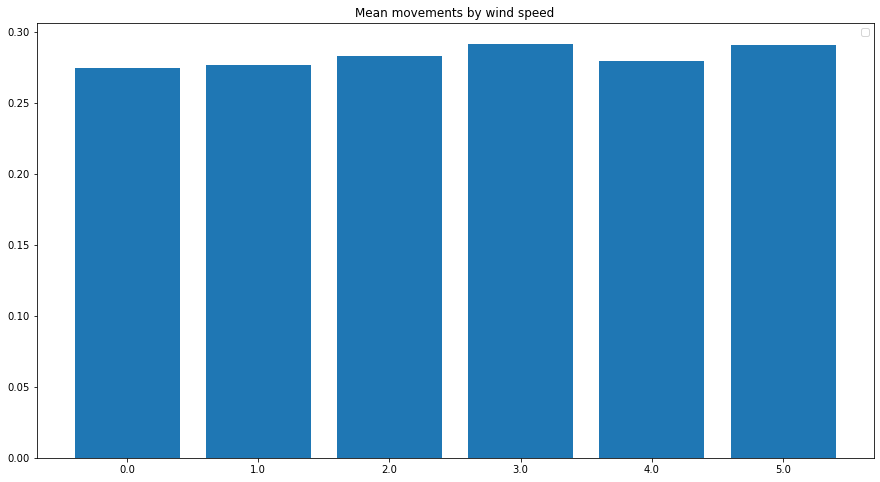

In [18]:
# viento

aux = data
aux['Vel_mean'] = round(aux['Vel_mean'])

by_vel = aux.groupby(['Vel_mean'], as_index = False)['Mov'].mean()
by_vel['Mov'] = by_vel['Mov']/2


x = np.arange(len(by_vel))
width = 0.25

plt.figure(figsize=(15, 8))
plt.bar(x, by_vel['Mov'])

plt.xticks(x, by_vel['Vel_mean'])
plt.legend()
plt.title('Mean movements by wind speed')

No se aprecian diferencias.

Text(0.5, 1.0, 'Mean movements by wind speed')

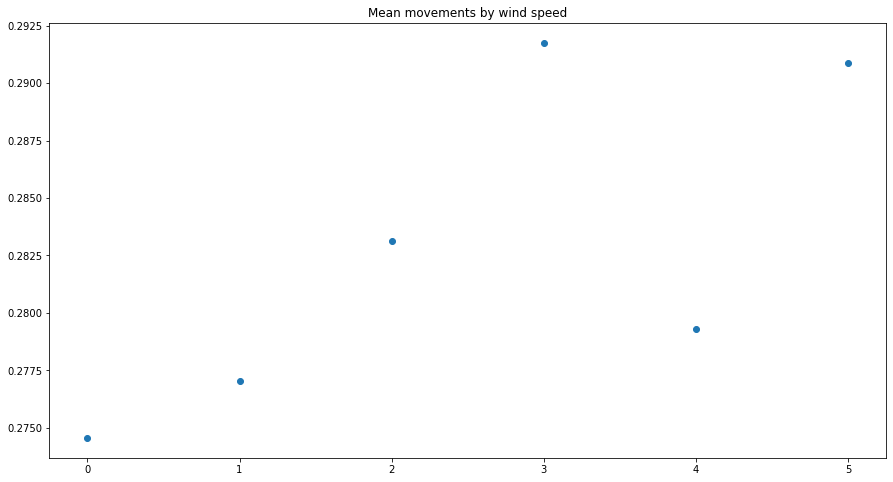

In [20]:
# viento

aux = data
#aux['Vel_mean'] = round(aux['Vel_mean'])

by_vel = aux.groupby(['Vel_mean'], as_index = False)['Mov'].mean()
by_vel['Mov'] = by_vel['Mov']/2


#x = np.arange(len(by_vel))
width = 0.25

plt.figure(figsize=(15, 8))
plt.scatter(by_vel['Vel_mean'], by_vel['Mov'])

#plt.xticks(x, by_vel['Vel_mean'])
#plt.legend()
plt.title('Mean movements by wind speed')